In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import  mean_absolute_error

In [4]:
orig_df = pd.read_csv('../../data/dengue_features_train.csv')
labels_df =  pd.read_csv('../../data/dengue_labels_train.csv')

In [8]:



imp_df = pd.DataFrame(columns=orig_df.columns)

for c in orig_df.city.unique():

    imp = SimpleImputer(strategy="most_frequent")
    np_arr = imp.fit_transform(orig_df[orig_df['city']==c])
    _df = pd.DataFrame(np_arr, columns = orig_df.columns)
    imp_df = pd.concat([imp_df, _df])

imp_df.reset_index(inplace=True)
imp_df = imp_df.astype(orig_df.dtypes.to_dict()).drop('index', axis=1)

df = imp_df
df = pd.concat([df,labels_df['total_cases']], axis=1)
df['city'] = df['city'].map({'sj':0, 'iq':1})




/home/jan/.local/lib/python3.8/site-packages/sklearn/impute/_base.py:42: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(array)
/home/jan/.local/lib/python3.8/site-packages/sklearn/impute/_base.py:42: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  m

In [ ]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler().fit(X_test)
X_norm = min_max_scaler.transform(X)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train)
X_std = scaler.transform(X)

In [12]:
df['week_start_date']

0       1990-04-30
1       1990-05-07
2       1990-05-14
3       1990-05-21
4       1990-05-28
           ...    
1451    2010-05-28
1452    2010-06-04
1453    2010-06-11
1454    2010-06-18
1455    2010-06-25
Name: week_start_date, Length: 1456, dtype: object

In [15]:
df['week_start_date'] = pd.to_datetime(df['week_start_date'], format='%Y-%m-%d')

In [20]:
df['week_start_date'].dt.week

/tmp/ipykernel_41249/2092336740.py:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df['week_start_date'].dt.week


0       18
1       19
2       20
3       21
4       22
        ..
1451    21
1452    22
1453    23
1454    24
1455    25
Name: week_start_date, Length: 1456, dtype: int64

In [21]:
df.columns

Index(['city', 'year', 'weekofyear', 'week_start_date', 'ndvi_ne', 'ndvi_nw',
       'ndvi_se', 'ndvi_sw', 'precipitation_amt_mm', 'reanalysis_air_temp_k',
       'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
       'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm', 'total_cases'],
      dtype='object')

In [5]:
df = orig_df

In [72]:
df[df['city']==0]
endemic_dict={'station_max_temp_c': 32.8, 'station_avg_temp_c': 28.178571, 'reanalysis_specific_humidity_g_per_kg': 17.87, 'reanalysis_sat_precip_amt_mm': 51.405, 'reanalysis_relative_humidity_percent':80.895, 'reanalysis_precip_amt_kg_per_m2': 36.36, 'reanalysis_max_air_temp_k': 302.4, 'precipitation_amt_mm': 38.44}
for e, v in endemic_dict.items():
    df.loc[df['city']==0, e+'_endemic'] =  df[df['city']==0][e]>v
    
    


In [84]:
df

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,station_avg_temp_c_endemic,reanalysis_specific_humidity_g_per_kg_endemic,reanalysis_sat_precip_amt_mm_endemic,reanalysis_relative_humidity_percent_endemic,reanalysis_precip_amt_kg_per_m2_endemic,reanalysis_max_air_temp_k_endemic,precipitation_amt_mm_endemic,ndvi_sw_endemic,ndvi_se_endemic,weekofyear_endemic
0,0,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,False,False,False,False,False,False,False,False,False,False
1,0,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,False,False,False,False,False,False,False,False,False,False
2,0,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,False,False,False,True,False,False,False,True,False,False
3,0,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,False,False,False,False,False,False,False,False,False,False
4,0,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,True,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451,1,2010,21,2010-05-28,0.342750,0.318900,0.256343,0.292514,55.30,299.334286,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1452,1,2010,22,2010-06-04,0.160157,0.160371,0.136043,0.225657,86.47,298.330000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1453,1,2010,23,2010-06-11,0.247057,0.146057,0.250357,0.233714,58.94,296.598571,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1454,1,2010,24,2010-06-18,0.333914,0.245771,0.278886,0.325486,59.67,296.345714,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [75]:
 df.loc[df['city']==0, 'ndvi_sw_endemic'] = ( df[df['city']==0]['ndvi_sw']>0.168871) & ( df[df['city']==0]['ndvi_sw']<0.173900)

In [76]:
 df.loc[df['city']==0, 'ndvi_se_endemic'] = ( df[df['city']==0]['ndvi_se']>0.180967) & ( df[df['city']==0]['ndvi_se']<0.198483)
 df.loc[df['city']==0, 'weekofyear_endemic'] = ( df[df['city']==0]['weekofyear']>38) & ( df[df['city']==0]['weekofyear']<45)

In [83]:
for i in df[df['city']==0]:
    print(df[df['city']==0][i].value_counts())

0    936
Name: city, dtype: int64
1999    52
2007    52
1993    52
1994    52
1995    52
1996    52
1997    52
1998    52
2000    52
1991    52
2001    52
2002    52
2003    52
2004    52
2005    52
2006    52
1992    52
1990    35
2008    17
Name: year, dtype: int64
27    18
26    18
24    18
23    18
22    18
21    18
20    18
19    18
18    18
17    18
16    18
15    18
14    18
13    18
12    18
11    18
10    18
9     18
8     18
7     18
6     18
5     18
4     18
3     18
2     18
25    18
1     18
40    18
51    18
49    18
48    18
47    18
46    18
45    18
44    18
43    18
42    18
41    18
28    18
39    18
38    18
37    18
36    18
35    18
34    18
33    18
32    18
31    18
30    18
29    18
50    18
52    15
53     3
Name: weekofyear, dtype: int64
2005-03-19    1
2007-02-26    1
2001-08-13    1
1993-07-02    1
1994-09-17    1
             ..
2003-07-23    1
1991-03-05    1
2003-12-17    1
1992-09-02    1
2002-10-08    1
Name: week_start_date, Length: 936, dtype: int64

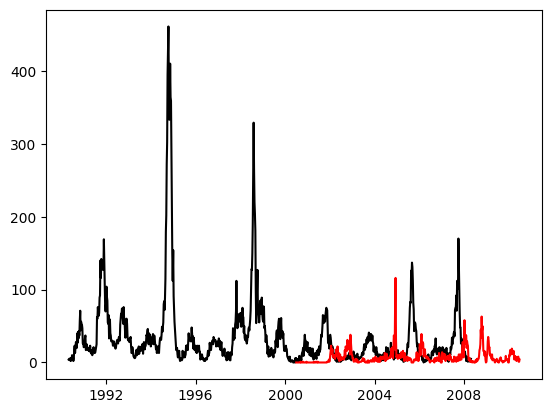

In [34]:

plt.plot(df[df['city']==0]['week_start_date'],df[df['city']==0]['total_cases'],color='k')
plt.plot(df[df['city']==1]['week_start_date'],df[df['city']==1]['total_cases'],color='r')

plt.show()

In [12]:
df[(df['city']==0)&(df['total_cases']>150)]

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
82,0,1991,48,1991-11-26,0.087867,0.151900,0.179629,0.166186,35.34,298.375714,...,81.485714,35.34,16.322857,2.028571,26.271429,6.585714,30.0,22.2,76.2,169
226,0,1994,35,1994-09-03,0.021850,0.145250,0.213786,0.204086,59.91,300.392857,...,78.482857,59.91,17.705714,2.528571,29.428571,6.885714,33.9,25.6,11.0,179
227,0,1994,36,1994-09-10,0.045850,0.076225,0.291686,0.247971,19.45,300.074286,...,79.138571,19.45,17.521429,2.642857,29.285714,6.357143,33.3,24.4,14.4,202
228,0,1994,37,1994-09-17,0.096900,0.112700,0.095500,0.192925,61.11,299.951429,...,78.750000,61.11,17.305714,2.457143,28.557143,6.900000,34.4,23.9,50.8,272
229,0,1994,38,1994-09-24,0.096900,0.112700,0.198483,0.168871,39.22,299.885714,...,79.314286,39.22,17.354286,1.985714,28.371429,6.185714,32.2,24.4,34.3,302
230,0,1994,39,1994-10-01,0.096900,0.112700,0.198483,0.168871,55.88,299.508571,...,80.372857,55.88,17.248571,2.600000,28.014286,6.700000,33.9,23.3,31.5,395
231,0,1994,40,1994-10-08,0.096900,0.112700,0.198483,0.168871,0.63,300.377143,...,74.117143,0.63,16.744286,2.628571,28.714286,6.900000,34.4,24.4,8.2,426
232,0,1994,41,1994-10-15,0.096900,0.112700,0.198483,0.168871,16.70,299.638571,...,78.225714,16.70,16.900000,2.728571,28.328571,7.657143,35.0,23.9,39.2,461
233,0,1994,42,1994-10-22,0.096900,0.112700,0.198483,0.168871,75.57,300.238571,...,76.348571,75.57,17.124286,3.028571,28.571429,7.442857,35.0,23.9,5.4,381
234,0,1994,43,1994-10-29,0.096900,0.112700,0.198483,0.168871,111.52,298.811429,...,85.417143,111.52,17.641429,1.657143,27.671429,7.271429,32.8,23.3,39.2,333


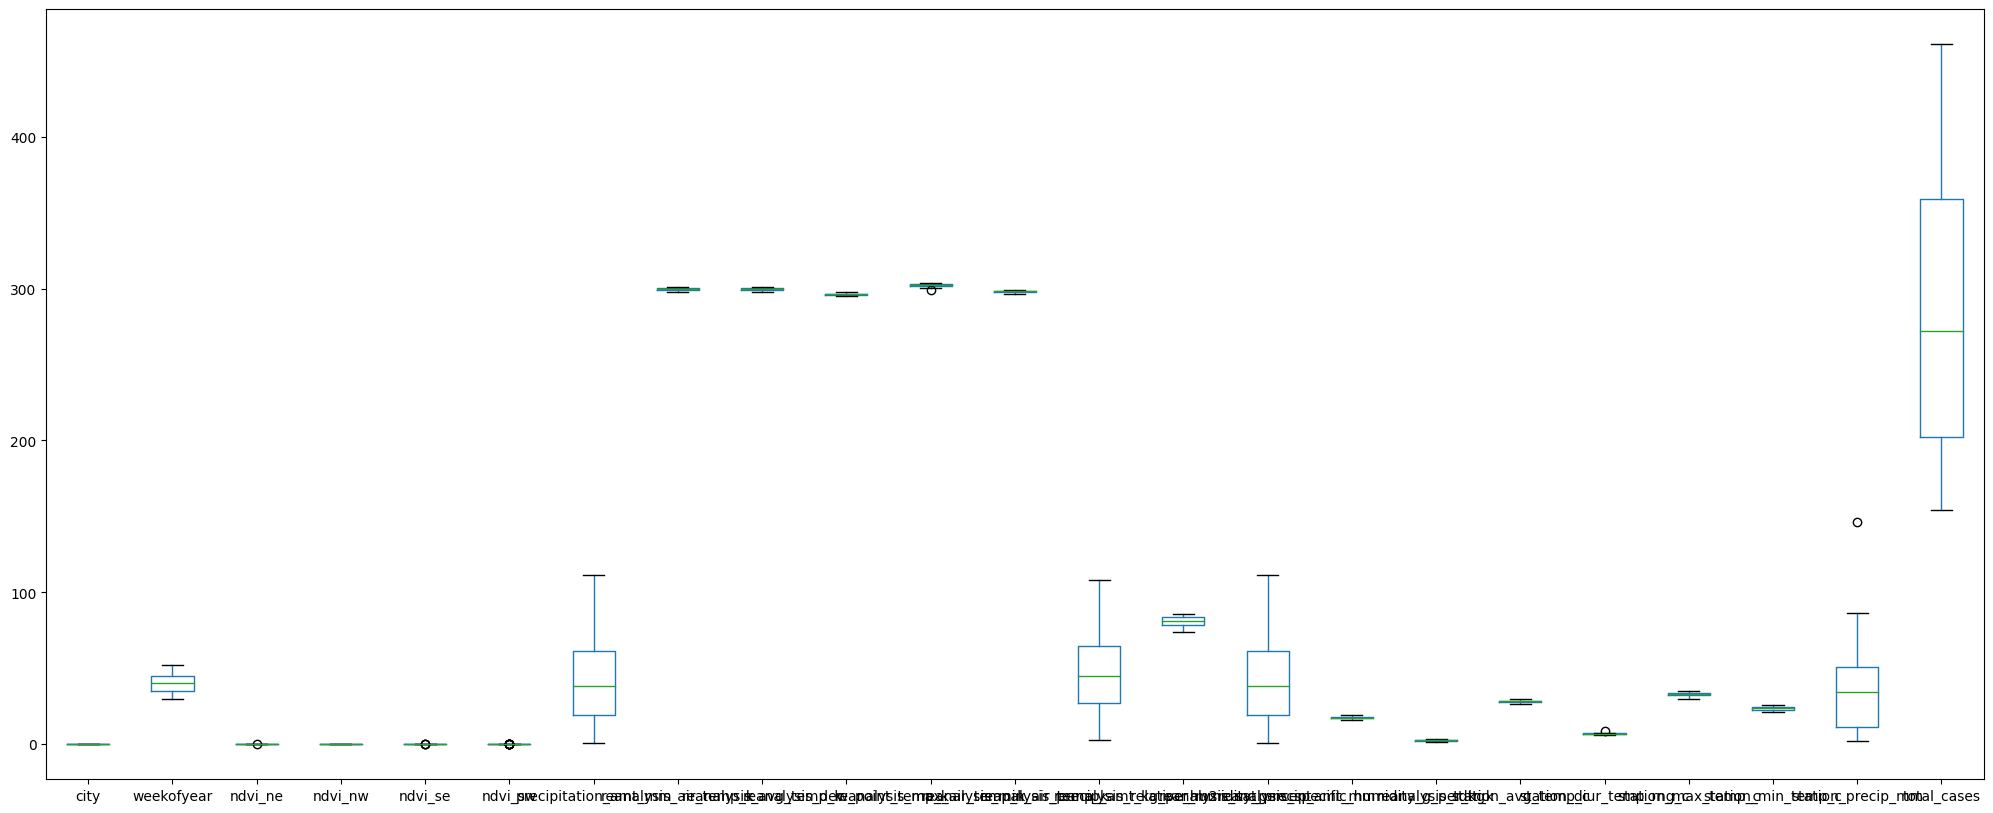

In [18]:
df[(df['city']==0)&(df['total_cases']>150)].drop('year',axis=1).plot(kind='box',figsize=(25,10))

In [45]:

import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
df['epidemic'] = df['total_cases']>150

In [29]:
df['epidemic'] = df['epidemic'].map({False:0, True:1})

city


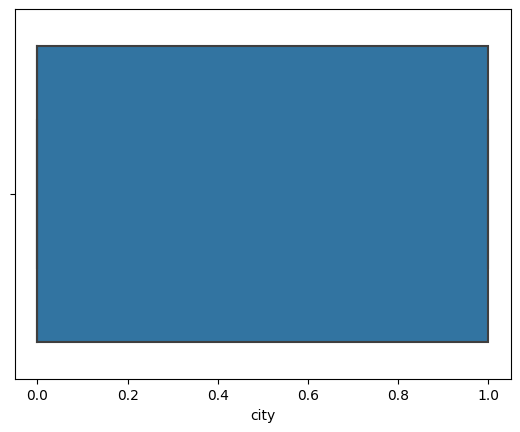

year


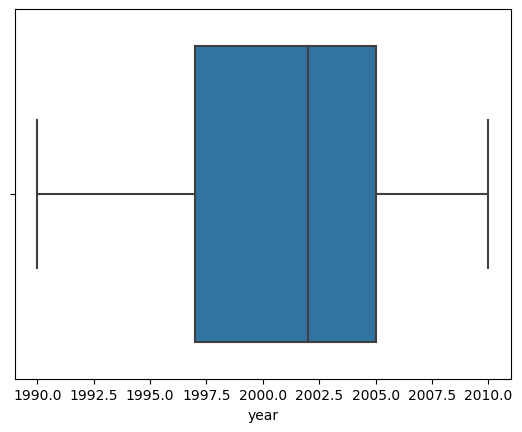

In [47]:
for i in df.columns[:2]:
    print(i)
    sns.boxplot(x=df[i])
    plt.show()
    
    

city
count    911.0
mean       0.0
std        0.0
min        0.0
25%        0.0
50%        0.0
75%        0.0
max        0.0
Name: city, dtype: float64
count    25.0
mean      0.0
std       0.0
min       0.0
25%       0.0
50%       0.0
75%       0.0
max       0.0
Name: city, dtype: float64


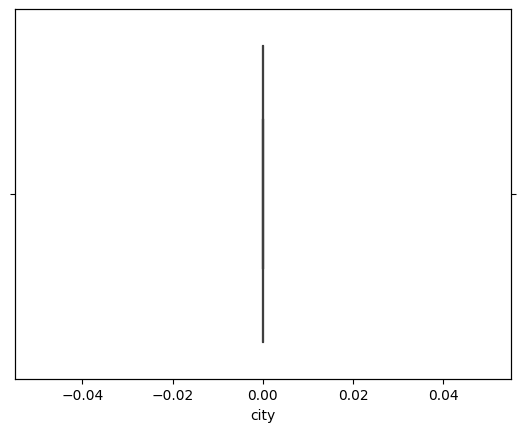


year
count     911.000000
mean     1998.916575
std         5.230475
min      1990.000000
25%      1995.000000
50%      1999.000000
75%      2003.000000
max      2008.000000
Name: year, dtype: float64
count      25.000000
mean     1995.560000
std         3.096773
min      1991.000000
25%      1994.000000
50%      1994.000000
75%      1998.000000
max      2007.000000
Name: year, dtype: float64


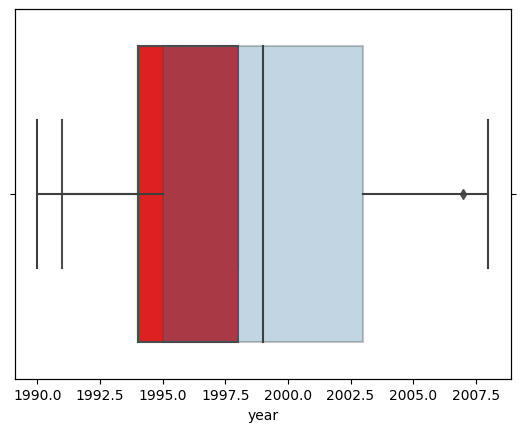


weekofyear
count    911.000000
mean      26.131723
std       15.022481
min        1.000000
25%       13.000000
50%       26.000000
75%       39.000000
max       53.000000
Name: weekofyear, dtype: float64
count    25.000000
mean     40.040000
std       6.187891
min      30.000000
25%      35.000000
50%      40.000000
75%      45.000000
max      52.000000
Name: weekofyear, dtype: float64


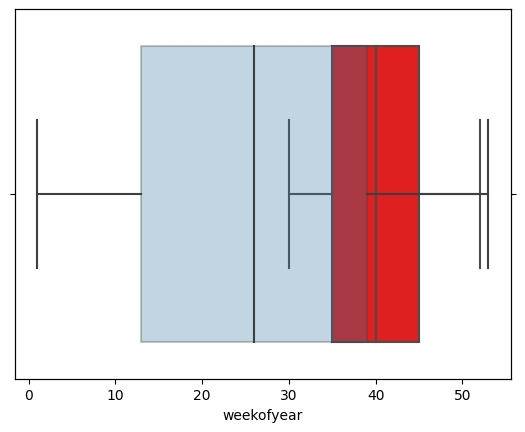


week_start_date
count            911
unique           911
top       2005-03-19
freq               1
Name: week_start_date, dtype: object
count             25
unique            25
top       1994-11-05
freq               1
Name: week_start_date, dtype: object
ndvi_ne
count    911.000000
mean       0.065260
std        0.097857
min       -0.406250
25%        0.018146
50%        0.083050
75%        0.100150
max        0.493400
Name: ndvi_ne, dtype: float64
count    25.000000
mean      0.088398
std       0.043845
min       0.021850
25%       0.055400
50%       0.096900
75%       0.096900
max       0.243800
Name: ndvi_ne, dtype: float64


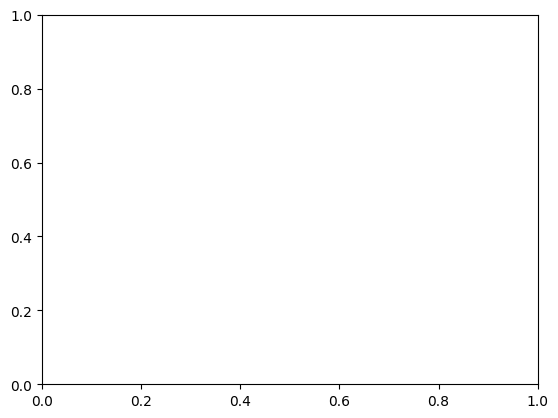

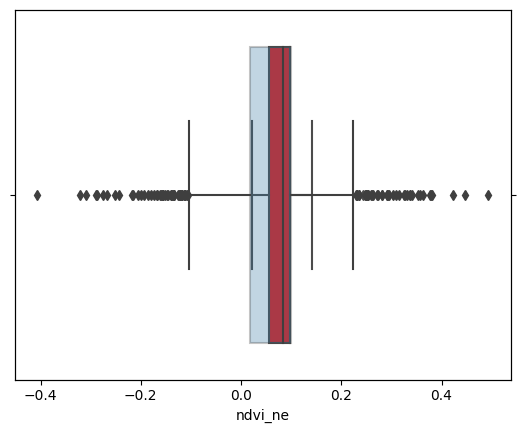


ndvi_nw
count    911.000000
mean       0.069032
std        0.091550
min       -0.456100
25%        0.017820
50%        0.070700
75%        0.113325
max        0.437100
Name: ndvi_nw, dtype: float64
count    25.000000
mean      0.099174
std       0.031129
min       0.024767
25%       0.076225
50%       0.112700
75%       0.112700
max       0.151900
Name: ndvi_nw, dtype: float64


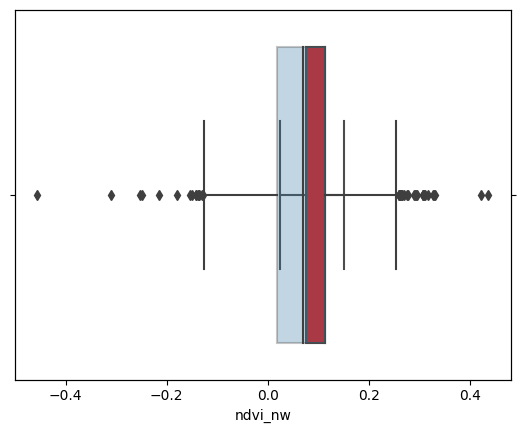


ndvi_se
count    911.000000
mean       0.177624
std        0.057077
min       -0.015533
25%        0.139227
50%        0.177229
75%        0.212271
max        0.393129
Name: ndvi_se, dtype: float64
count    25.000000
mean      0.194639
std       0.035339
min       0.095500
25%       0.180967
50%       0.198483
75%       0.198483
max       0.291686
Name: ndvi_se, dtype: float64


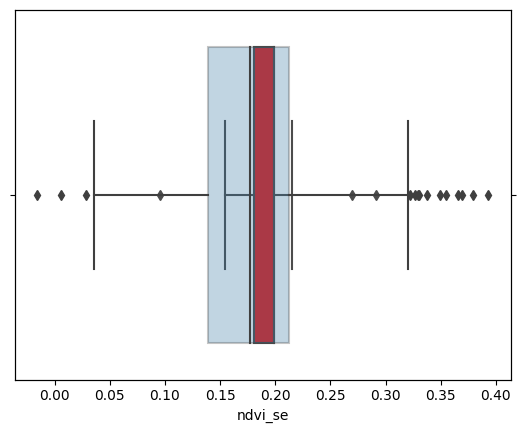


ndvi_sw
count    911.000000
mean       0.165750
std        0.056064
min       -0.063457
25%        0.129121
50%        0.165986
75%        0.202662
max        0.381420
Name: ndvi_sw, dtype: float64
count    25.000000
mean      0.175657
std       0.027093
min       0.117729
25%       0.168871
50%       0.168871
75%       0.173900
max       0.247971
Name: ndvi_sw, dtype: float64


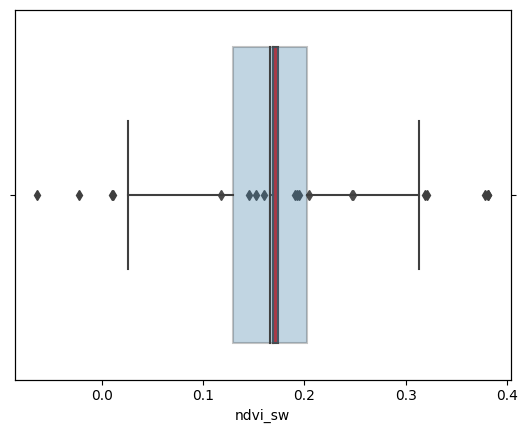


precipitation_amt_mm
count    911.000000
mean      34.904555
std       44.871498
min        0.000000
25%        0.000000
50%       20.040000
75%       51.405000
max      390.600000
Name: precipitation_amt_mm, dtype: float64
count     25.000000
mean      43.335600
std       28.660027
min        0.630000
25%       19.450000
50%       38.440000
75%       61.110000
max      111.520000
Name: precipitation_amt_mm, dtype: float64


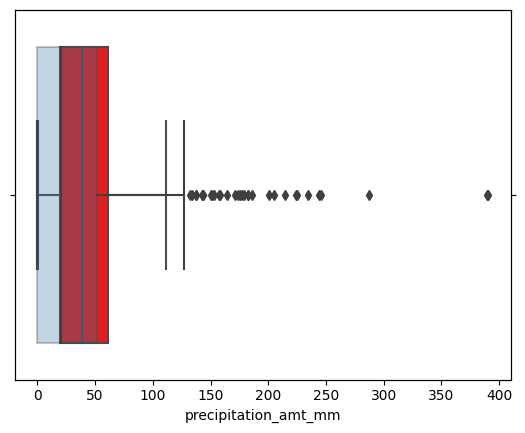


reanalysis_air_temp_k
count    911.000000
mean     299.151714
std        1.239777
min      295.938571
25%      298.178571
50%      299.237143
75%      300.120000
max      302.200000
Name: reanalysis_air_temp_k, dtype: float64
count     25.000000
mean     299.772000
std        0.797124
min      297.808571
25%      299.297143
50%      299.885714
75%      300.377143
max      301.022857
Name: reanalysis_air_temp_k, dtype: float64


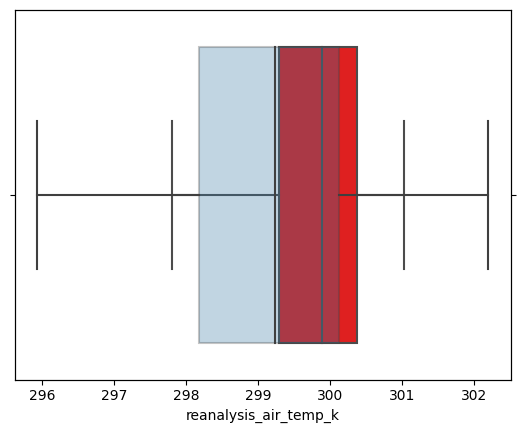


reanalysis_avg_temp_k
count    911.000000
mean     299.266175
std        1.222360
min      296.114286
25%      298.282143
50%      299.378571
75%      300.214286
max      302.164286
Name: reanalysis_avg_temp_k, dtype: float64
count     25.000000
mean     299.850571
std        0.792444
min      297.950000
25%      299.300000
50%      300.035714
75%      300.500000
max      301.028571
Name: reanalysis_avg_temp_k, dtype: float64


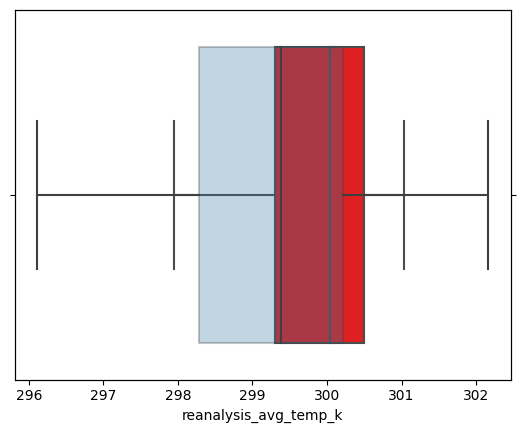


reanalysis_dew_point_temp_k
count    911.000000
mean     295.090417
std        1.576056
min      289.642857
25%      293.812143
50%      295.438571
75%      296.425000
max      297.795714
Name: reanalysis_dew_point_temp_k, dtype: float64
count     25.000000
mean     296.175657
std        0.786513
min      294.812857
25%      295.674286
50%      296.131429
75%      296.642857
max      297.467143
Name: reanalysis_dew_point_temp_k, dtype: float64


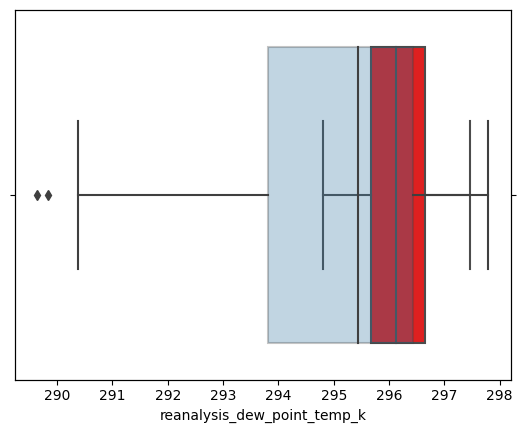


reanalysis_max_air_temp_k
count    911.000000
mean     301.383864
std        1.257563
min      297.800000
25%      300.400000
50%      301.500000
75%      302.400000
max      304.300000
Name: reanalysis_max_air_temp_k, dtype: float64
count     25.000000
mean     302.160000
std        0.987843
min      299.400000
25%      301.800000
50%      302.200000
75%      303.000000
max      303.500000
Name: reanalysis_max_air_temp_k, dtype: float64


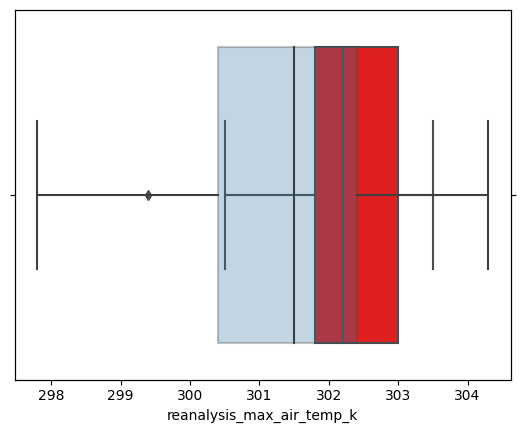


reanalysis_min_air_temp_k
count    911.000000
mean     297.288474
std        1.298651
min      292.600000
25%      296.300000
50%      297.500000
75%      298.350000
max      299.900000
Name: reanalysis_min_air_temp_k, dtype: float64
count     25.000
mean     297.956
std        0.780
min      296.300
25%      297.500
50%      298.100
75%      298.600
max      299.100
Name: reanalysis_min_air_temp_k, dtype: float64


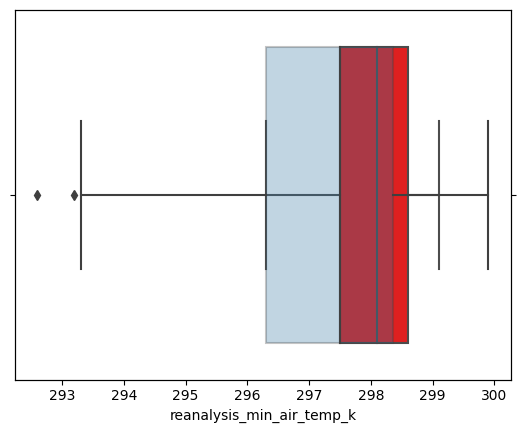


reanalysis_precip_amt_kg_per_m2
count    911.000000
mean      29.814566
std       35.573883
min        0.000000
25%       10.300000
50%       20.640000
75%       36.360000
max      570.500000
Name: reanalysis_precip_amt_kg_per_m2, dtype: float64
count     25.000000
mean      48.862800
std       30.088839
min        2.800000
25%       27.400000
50%       45.200000
75%       64.850000
max      107.870000
Name: reanalysis_precip_amt_kg_per_m2, dtype: float64


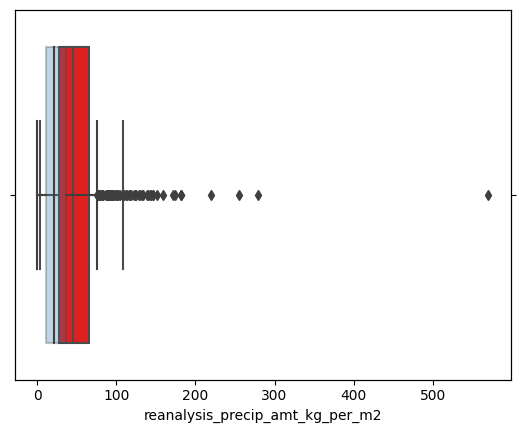


reanalysis_relative_humidity_percent
count    911.000000
mean      78.503568
std        3.369237
min       66.735714
25%       76.201429
50%       78.620000
75%       80.895000
max       87.575714
Name: reanalysis_relative_humidity_percent, dtype: float64
count    25.000000
mean     80.861086
std       2.943861
min      74.117143
25%      78.685714
50%      81.217143
75%      83.450000
max      85.570000
Name: reanalysis_relative_humidity_percent, dtype: float64


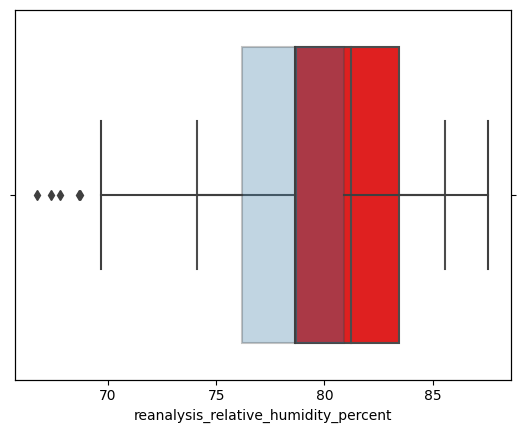


reanalysis_sat_precip_amt_mm
count    911.000000
mean      34.904555
std       44.871498
min        0.000000
25%        0.000000
50%       20.040000
75%       51.405000
max      390.600000
Name: reanalysis_sat_precip_amt_mm, dtype: float64
count     25.000000
mean      43.335600
std       28.660027
min        0.630000
25%       19.450000
50%       38.440000
75%       61.110000
max      111.520000
Name: reanalysis_sat_precip_amt_mm, dtype: float64


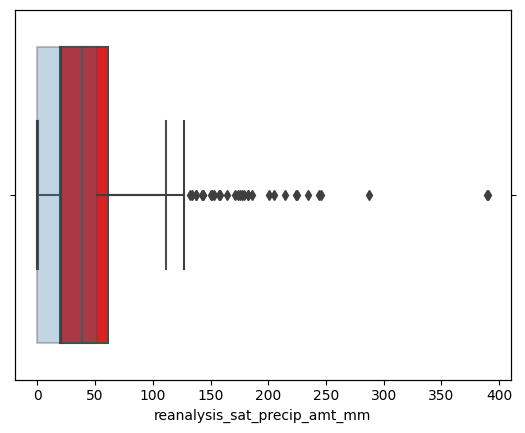


reanalysis_specific_humidity_g_per_kg
count    911.000000
mean      16.533094
std        1.565853
min       11.715714
25%       15.203571
50%       16.822857
75%       17.870000
max       19.440000
Name: reanalysis_specific_humidity_g_per_kg, dtype: float64
count    25.000000
mean     17.625600
std       0.850097
min      16.178571
25%      17.067143
50%      17.521429
75%      18.118571
max      19.027143
Name: reanalysis_specific_humidity_g_per_kg, dtype: float64


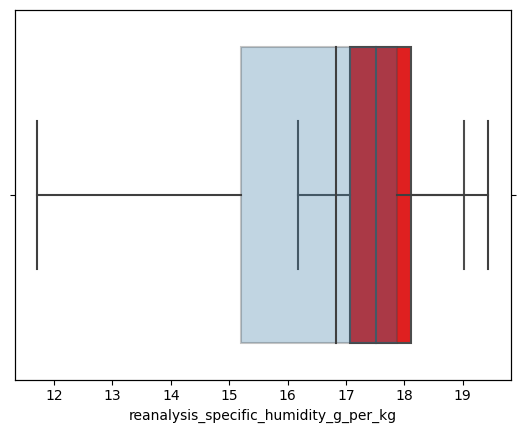


reanalysis_tdtr_k
count    911.000000
mean       2.519523
std        0.497948
min        1.357143
25%        2.157143
50%        2.457143
75%        2.800000
max        4.428571
Name: reanalysis_tdtr_k, dtype: float64
count    25.000000
mean      2.359429
std       0.461543
min       1.500000
25%       2.028571
50%       2.400000
75%       2.671429
max       3.271429
Name: reanalysis_tdtr_k, dtype: float64


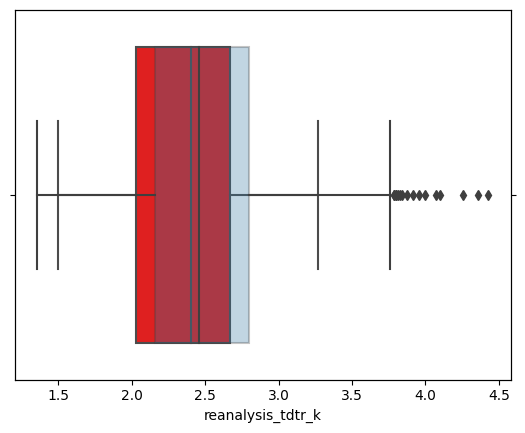


station_avg_temp_c
count    911.000000
mean      26.986420
std        1.416908
min       22.842857
25%       25.792857
50%       27.200000
75%       28.178571
max       30.071429
Name: station_avg_temp_c, dtype: float64
count    25.000000
mean     28.070286
std       0.844731
min      26.271429
25%      27.557143
50%      28.157143
75%      28.571429
max      29.428571
Name: station_avg_temp_c, dtype: float64


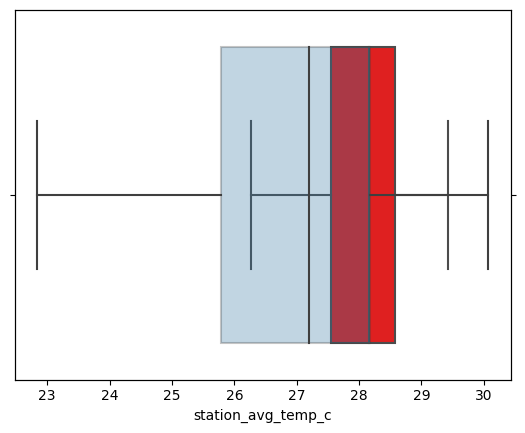


station_diur_temp_rng_c
count    911.000000
mean       6.749553
std        0.839283
min        4.528571
25%        6.185714
50%        6.757143
75%        7.285714
max        9.914286
Name: station_diur_temp_rng_c, dtype: float64
count    25.000000
mean      6.905143
std       0.633166
min       5.728571
25%       6.414286
50%       6.885714
75%       7.271429
max       8.742857
Name: station_diur_temp_rng_c, dtype: float64


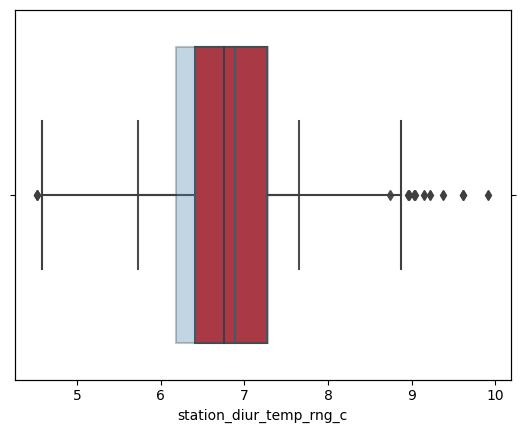


station_max_temp_c
count    911.000000
mean      31.581120
std        1.711331
min       26.700000
25%       30.600000
50%       31.700000
75%       32.800000
max       35.600000
Name: station_max_temp_c, dtype: float64
count    25.000000
mean     32.872000
std       1.331828
min      30.000000
25%      32.200000
50%      32.800000
75%      33.900000
max      35.000000
Name: station_max_temp_c, dtype: float64


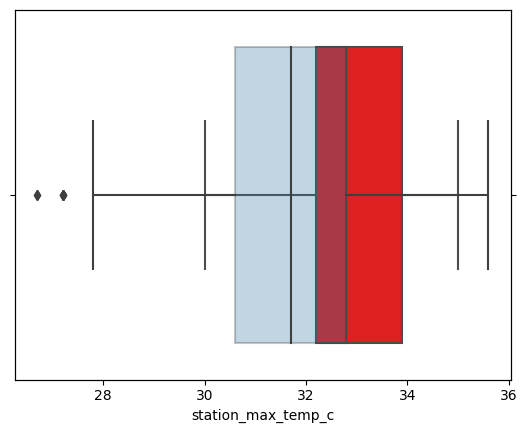


station_min_temp_c
count    911.000000
mean      22.585291
std        1.508169
min       17.800000
25%       21.700000
50%       22.800000
75%       23.900000
max       25.600000
Name: station_min_temp_c, dtype: float64
count    25.000000
mean     23.472000
std       1.096403
min      21.100000
25%      22.200000
50%      23.900000
75%      24.400000
max      25.600000
Name: station_min_temp_c, dtype: float64


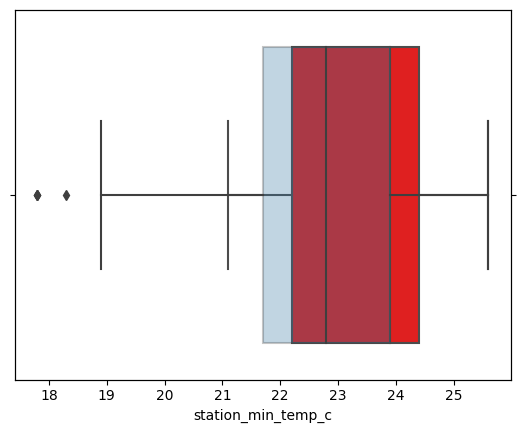


station_precip_mm
count    911.000000
mean      26.290450
std       29.140723
min        0.000000
25%        6.550000
50%       17.300000
75%       34.350000
max      305.900000
Name: station_precip_mm, dtype: float64
count     25.000000
mean      38.396000
std       33.478233
min        1.900000
25%       11.000000
50%       34.300000
75%       50.800000
max      146.400000
Name: station_precip_mm, dtype: float64


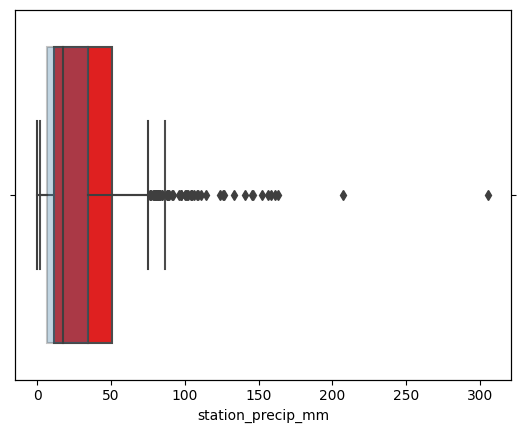


total_cases
count    911.000000
mean      27.343578
std       27.083417
min        0.000000
25%        9.000000
50%       18.000000
75%       35.000000
max      150.000000
Name: total_cases, dtype: float64
count     25.000000
mean     283.320000
std       92.781428
min      154.000000
25%      202.000000
50%      272.000000
75%      359.000000
max      461.000000
Name: total_cases, dtype: float64


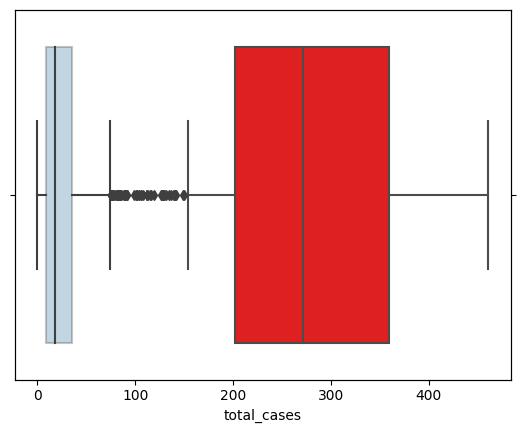


epidemic
count    911.0
mean       0.0
std        0.0
min        0.0
25%        0.0
50%        0.0
75%        0.0
max        0.0
Name: epidemic, dtype: float64
count    25.0
mean      1.0
std       0.0
min       1.0
25%       1.0
50%       1.0
75%       1.0
max       1.0
Name: epidemic, dtype: float64


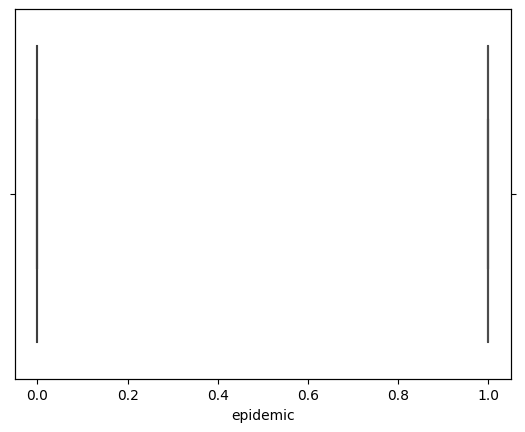

In [62]:
for c in df.columns:
    print(c)
    print(df[(df['city']==0)&(df['total_cases']<=150)][c].describe())
    print(df[(df['city']==0)&(df['total_cases']>150)][c].describe())
    try:
        fig, ax = plt.subplots()
        sns.boxplot(x=df[(df['city']==0)&(df['total_cases']>150)][c], color='r', ax=ax)
        ax2 = ax.twinx()
        #plt.show()
        sns.boxplot(x=df[(df['city']==0)&(df['total_cases']<=150)][c], boxprops=dict(alpha=.3),ax=ax2)
        plt.show()
    except:
        continue
    print('')
    

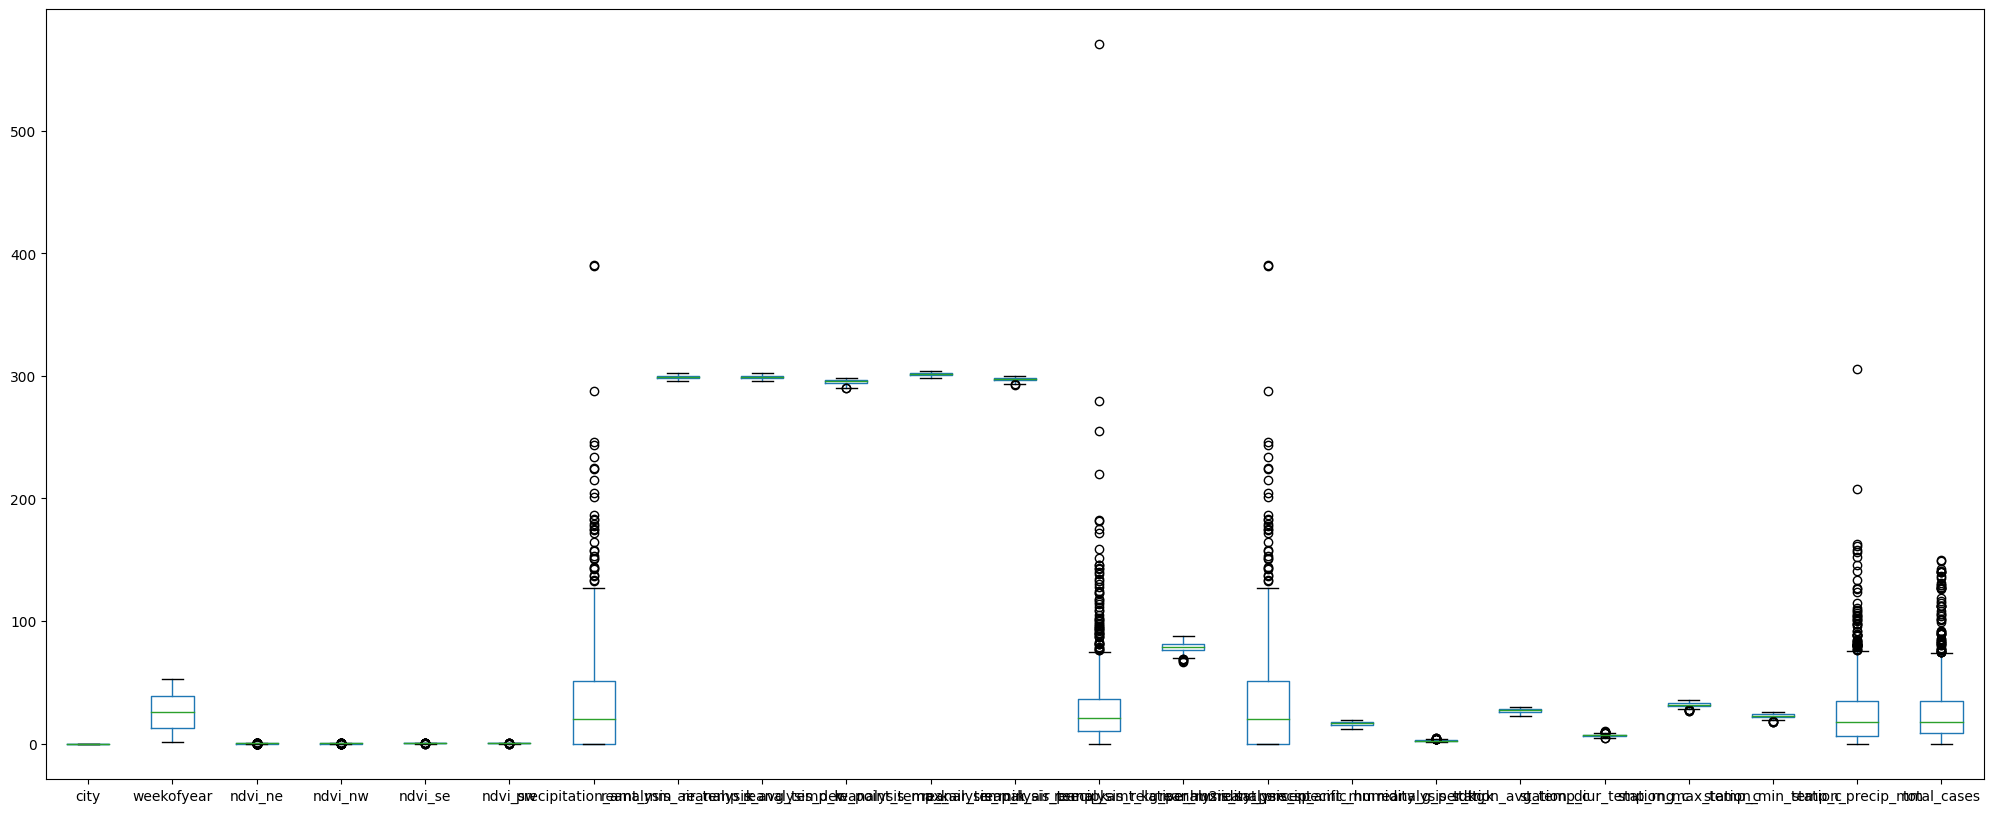

In [19]:
df[(df['city']==0)&(df['total_cases']<=150)].drop('year',axis=1).plot(kind='box',figsize=(25,10))

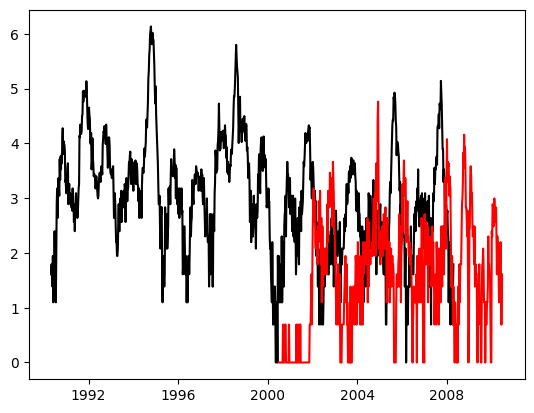

In [43]:

plt.plot(df[df['city']==0]['week_start_date'],df[df['city']==0]['log_total_cases+1'],color='k')
plt.plot(df[df['city']==1]['week_start_date'],df[df['city']==1]['log_total_cases+1'],color='r')

plt.show()

In [35]:
df['log_total_cases'] = np.log(df['total_cases'])

/home/jan/anaconda3/envs/dsr-test-b32/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [36]:
df['log_total_cases']

0       1.386294
1       1.609438
2       1.386294
3       1.098612
4       1.791759
          ...   
1451    1.609438
1452    2.079442
1453    0.000000
1454    0.000000
1455    1.386294
Name: log_total_cases, Length: 1456, dtype: float64

In [44]:
df[['log_total_cases+1','total_cases']].describe()

,log_total_cases+1,total_cases
count,1456.000000,1456.000000
mean,2.502050,24.675137
std,1.240822,43.596000
min,0.000000,0.000000
25%,1.791759,5.000000
50%,2.564949,12.000000
75%,3.367296,28.000000
max,6.135565,461.000000


In [39]:
df[['log_total_cases','total_cases']].value_counts()

log_total_cases  total_cases
-inf             0              100
 1.791759        6               71
 1.098612        3               70
 1.609438        5               70
 0.693147        2               69
                               ... 
 4.905275        135              1
 4.919981        137              1
 4.948760        141              1
 4.955827        142              1
 6.133398        461              1
Length: 135, dtype: int64

In [41]:
df['total_cases+1'] = df['total_cases'] +1

In [42]:
df['log_total_cases+1'] = np.log(df['total_cases+1'])

In [64]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler().fit(df.drop(['total_cases', 'week_start_date', 'log_total_cases+1', 'log_total_cases', 'total_cases+1'],axis=1))
df_norm = min_max_scaler.transform(df.drop(['total_cases', 'week_start_date', 'log_total_cases+1', 'log_total_cases', 'total_cases+1'],axis=1))

In [65]:
df_norm

array([[0.        , 0.        , 0.32692308, ..., 0.17419355, 0.48623853,
        0.02944966],
       [0.        , 0.        , 0.34615385, ..., 0.32258065, 0.68807339,
        0.01582919],
       [0.        , 0.        , 0.36538462, ..., 0.35483871, 0.74311927,
        0.07620099],
       ...,
       [1.        , 1.        , 0.42307692, ..., 0.35483871, 0.41284404,
        0.01362047],
       [1.        , 1.        , 0.44230769, ..., 0.29032258, 0.57798165,
        0.02944966],
       [1.        , 1.        , 0.46153846, ..., 0.4516129 , 0.68807339,
        0.03754832]])

In [ ]:
df.drop(['total_cases', 'week_start_date', 'log_total_cases+1', 'log_total_cases', 'total_cases+1'],axis=1)

,city,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,0,1990,18,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,...,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,0,1990,19,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,...,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,0,1990,20,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,...,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,0,1990,21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,...,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,0,1990,22,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,...,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451,1,2010,21,0.342750,0.318900,0.256343,0.292514,55.30,299.334286,300.771429,...,45.00,88.765714,55.30,18.485714,9.800000,28.633333,11.933333,35.4,22.4,27.0
1452,1,2010,22,0.160157,0.160371,0.136043,0.225657,86.47,298.330000,299.392857,...,207.10,91.600000,86.47,18.070000,7.471429,27.433333,10.500000,34.7,21.7,36.6
1453,1,2010,23,0.247057,0.146057,0.250357,0.233714,58.94,296.598571,297.592857,...,50.60,94.280000,58.94,17.008571,7.500000,24.400000,6.900000,32.2,19.2,7.4
1454,1,2010,24,0.333914,0.245771,0.278886,0.325486,59.67,296.345714,297.521429,...,62.33,94.660000,59.67,16.815714,7.871429,25.433333,8.733333,31.2,21.0,16.0


In [45]:
y = df['log_total_cases+1']
X = df.drop(['total_cases', 'week_start_date', 'log_total_cases+1', 'log_total_cases', 'total_cases+1'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


In [48]:
np.exp(6.1355)

461.9700212929227

In [49]:
from catboost import CatBoostRegressor
reg = CatBoostRegressor().fit(X_train, y_train)
print(reg.score(X, y))    
print(mean_absolute_error(y_test, reg.predict(X_test)))
print(mean_absolute_error(np.exp(y_test), np.exp(reg.predict(X_test))))

Learning rate set to 0.0401
0:	learn: 1.2076313	total: 13.1ms	remaining: 13.1s
1:	learn: 1.1852499	total: 14.2ms	remaining: 7.1s
2:	learn: 1.1630965	total: 15.4ms	remaining: 5.13s
3:	learn: 1.1457223	total: 18.1ms	remaining: 4.51s
4:	learn: 1.1276156	total: 25.2ms	remaining: 5.01s
5:	learn: 1.1077069	total: 26.3ms	remaining: 4.36s
6:	learn: 1.0903565	total: 36.1ms	remaining: 5.12s
7:	learn: 1.0723286	total: 43.9ms	remaining: 5.44s
8:	learn: 1.0554032	total: 45.1ms	remaining: 4.96s
9:	learn: 1.0389517	total: 46.6ms	remaining: 4.61s
10:	learn: 1.0255830	total: 47.6ms	remaining: 4.28s
11:	learn: 1.0125929	total: 53.3ms	remaining: 4.39s
12:	learn: 1.0010582	total: 56.8ms	remaining: 4.31s
13:	learn: 0.9901894	total: 58.1ms	remaining: 4.09s
14:	learn: 0.9776719	total: 59.2ms	remaining: 3.89s
15:	learn: 0.9670886	total: 62.5ms	remaining: 3.84s
16:	learn: 0.9547315	total: 63.7ms	remaining: 3.68s
17:	learn: 0.9447662	total: 75.7ms	remaining: 4.13s
18:	learn: 0.9347162	total: 76.8ms	remaining: 3